In [21]:
from os import listdir, getcwd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
root_path = os.getcwd()[:-4]
input_path = root_path+"/input/"

In [31]:
in_pic_list = os.listdir(input_path)


In [32]:
in_pic_list

['2.jpg', '3.jpg', '1.jpg']

In [39]:
def ins_size(pic_name, fill_white):
    pic_org = plt.imread(input_path+pic_name)
    ins_hight = 2560
    ins_width = 2048
    ratio = ins_width * 2 / ins_hight
    l = round(pic_org.shape[0] * ratio)
    l_half = round(l/2)
    fill_color = 255 if fill_white=='yes' else 0
    canvas_left = np.full((pic_org.shape[0], l_half, 3), fill_color)
    canvas_right = np.full((pic_org.shape[0], l_half, 3), fill_color)
    split = round(pic_org.shape[1] / 2)
    canvas_left[:, -split:, :] = pic_org[:, :split, :]

    if pic_org.shape[1] % 2 == 0:
        canvas_right[:, :split, :] = pic_org[:, split:, :]
    else:
        canvas_right[:, :split-1, :] = pic_org[:, split:, :]

    canvas_left = canvas_left.astype(float) / 255
    canvas_right = canvas_right.astype(float) / 255
    # make the 3rd pic
    width_3 = pic_org.shape[1]
    hight_3 = round(width_3 * (ins_hight / ins_width))
    canvas_3 = np.full((hight_3, width_3, 3), fill_color)

    split_2 = round((hight_3 - pic_org.shape[0])/2)
    canvas_3[split_2:(split_2 + pic_org.shape[0]),:,:] = pic_org
    canvas_3 = canvas_3.astype(float) / 255

    output_path = root_path + "/output/"
    plt.imsave((output_path + pic_name[:-4] + '_left.jpg'), canvas_left)
    plt.imsave((output_path + pic_name[:-4] + '_right.jpg'), canvas_right)
    plt.imsave((output_path + pic_name[:-4] + '_centered.jpg'), canvas_3)
    
    return 

In [40]:
for pic_name in in_pic_list:
    ins_size(pic_name=pic_name, fill_white='no')

In [74]:
pic_name = "2.jpg"
fill_white = 'no' # 'yes' - white; other value - black

In [75]:
pic_org = plt.imread(pic_name)
pic_org.shape

(3744, 5616, 3)

In [76]:
ins_hight = 2560
ins_width = 2048
ratio = ins_width * 2 / ins_hight

In [77]:
l = round(pic_org.shape[0] * ratio)

In [78]:
l_half = round(l/2)

In [79]:
fill_color = 255 if fill_white=='yes' else 0

In [80]:
canvas_left = np.full((pic_org.shape[0], l_half, 3), fill_color)
canvas_right = np.full((pic_org.shape[0], l_half, 3), fill_color)

In [81]:
split = round(pic_org.shape[1] / 2)

In [82]:
pic_org.shape

(3744, 5616, 3)

In [83]:
canvas_left[:, -split:, :] = pic_org[:, :split, :]

if pic_org.shape[1] % 2 == 0:
    canvas_right[:, :split, :] = pic_org[:, split:, :]
else:
    canvas_right[:, :split-1, :] = pic_org[:, split:, :]

canvas_left = canvas_left.astype(float) / 255
canvas_right = canvas_right.astype(float) / 255

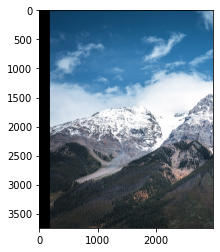

In [84]:
plt.imshow(canvas_left)

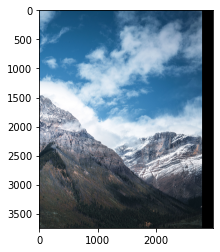

In [85]:
plt.imshow(canvas_right)

In [86]:
# make the 3rd pic
width_3 = pic_org.shape[1]
hight_3 = round(width_3 * (ins_hight / ins_width))
canvas_3 = np.full((hight_3, width_3, 3), fill_color)

split_2 = round((hight_3 - pic_org.shape[0])/2)

In [87]:
canvas_3[split_2:(split_2 + pic_org.shape[0]),:,:] = pic_org
canvas_3 = canvas_3.astype(float) / 255

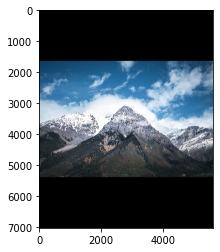

In [88]:
plt.imshow(canvas_3)

In [89]:
plt.imsave((pic_name[:-4] + '_left.jpg'), canvas_left)
plt.imsave((pic_name[:-4] + '_right.jpg'), canvas_right)
plt.imsave((pic_name[:-4] + '_centered.jpg'), canvas_3)